In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
import csv

In [4]:
salaries = []

In [5]:
with open("salaries.csv") as f:
    reader = csv.DictReader(f, delimiter=',')
    for line in reader:
        salaries.append(line)

In [6]:
salaries

[{'Experience': '15', 'Gender': 'Female', 'Salary': '78200'},
 {'Experience': '12', 'Gender': 'Female', 'Salary': '66400'},
 {'Experience': '15', 'Gender': 'Female', 'Salary': '61200'},
 {'Experience': '3', 'Gender': 'Female', 'Salary': '61000'},
 {'Experience': '4', 'Gender': 'Female', 'Salary': '60000'},
 {'Experience': '4', 'Gender': 'Female', 'Salary': '68000'},
 {'Experience': '9', 'Gender': 'Female', 'Salary': '59000'},
 {'Experience': '11', 'Gender': 'Female', 'Salary': '53600'},
 {'Experience': '16', 'Gender': 'Female', 'Salary': '62600'},
 {'Experience': '9', 'Gender': 'Female', 'Salary': '62400'},
 {'Experience': '16', 'Gender': 'Female', 'Salary': '69400'},
 {'Experience': '4', 'Gender': 'Female', 'Salary': '60000'},
 {'Experience': '3', 'Gender': 'Female', 'Salary': '62000'},
 {'Experience': '6', 'Gender': 'Female', 'Salary': '54000'},
 {'Experience': '17', 'Gender': 'Female', 'Salary': '59200'},
 {'Experience': '11', 'Gender': 'Female', 'Salary': '65200'},
 {'Experience': 

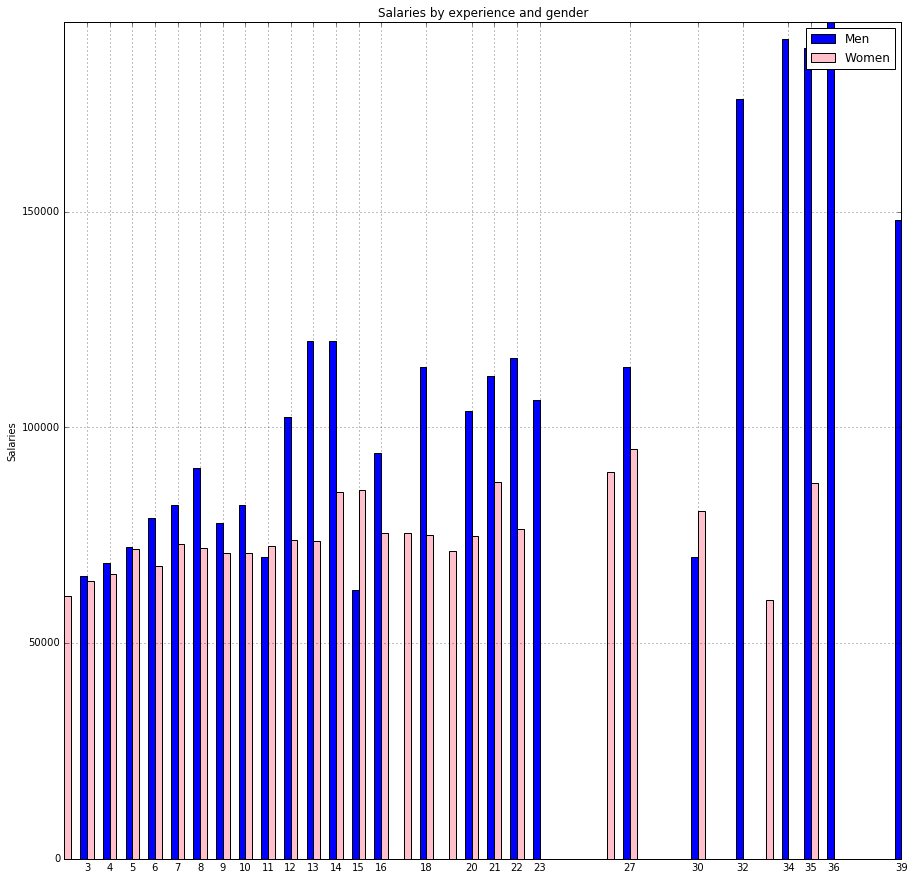

In [7]:
import collections
from itertools import groupby

m_sal = filter(lambda x: x['Gender'] == "Male", salaries)
f_sal = filter(lambda x: x['Gender'] == "Female", salaries)

m_exp = [int(j["Experience"]) for j in m_sal]
f_exp = [int(j["Experience"]) for j in f_sal]

def group_by_experience(sal):
    s = groupby(sorted(sal, key=lambda x:x["Experience"]), key=lambda x:x["Experience"])
    m = []
    for i, g in s:
        l = [t for t in g]
        avg = sum((int(t['Salary']) for t in l)) / len(l)
        m.append((avg, int(l[0]["Experience"])))
    return m

f_exp_grp = group_by_experience(f_sal)
m_exp_grp = group_by_experience(m_sal)

space = .3
width = space

plt.figure(figsize=(15,15))

for i, _ in enumerate(m_sal):
    mpos = np.array([exp[1] for exp in m_exp_grp])
    fpos = np.array([exp[1] for exp in f_exp_grp])

male_wage = np.array(map(lambda x: int(x[0]), m_exp_grp))
female_wage = np.array(map(lambda x: int(x[0]), f_exp_grp))

s = plt.subplot(111)


m = s.bar(mpos-(space/2), male_wage, width, color='blue', align='center')
f = s.bar(fpos+(space/2), female_wage, width, color='pink', align='center')

plt.ylabel('Salaries')
plt.title('Salaries by experience and gender')
plt.xticks(mpos)
plt.legend((m[0], f[0]), ('Men', 'Women'))
plt.grid()
plt.autoscale(tight=True)
plt.show()